<a href="https://colab.research.google.com/github/park-hoyeon/park-hoyeon.github.io/blob/master/skt_7_04_yolov9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv9: Learning What You Want to Learn Using Programmable Gradient Information

- 실시간 객체 탐지 가능한 알고리즘
- 2024년 2월 아카이빙되어 2024 ECCV에 게재(아키이빙 버전은 무료로 확인 가능)
- https://arxiv.org/abs/2402.13616

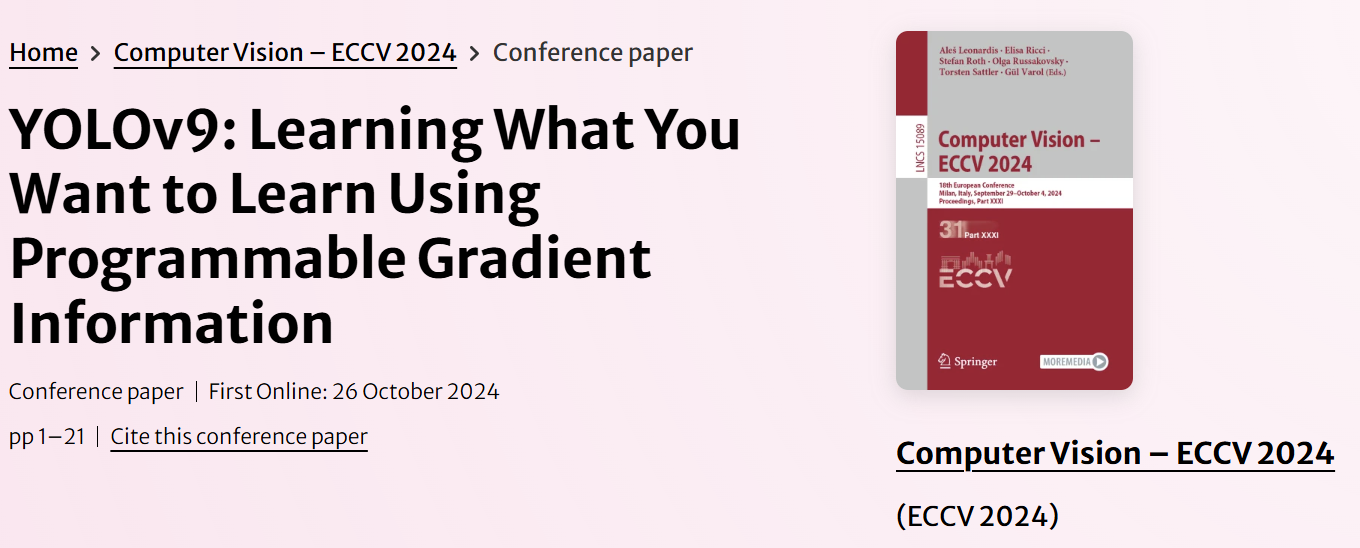

https://github.com/WongKinYiu/yolov9

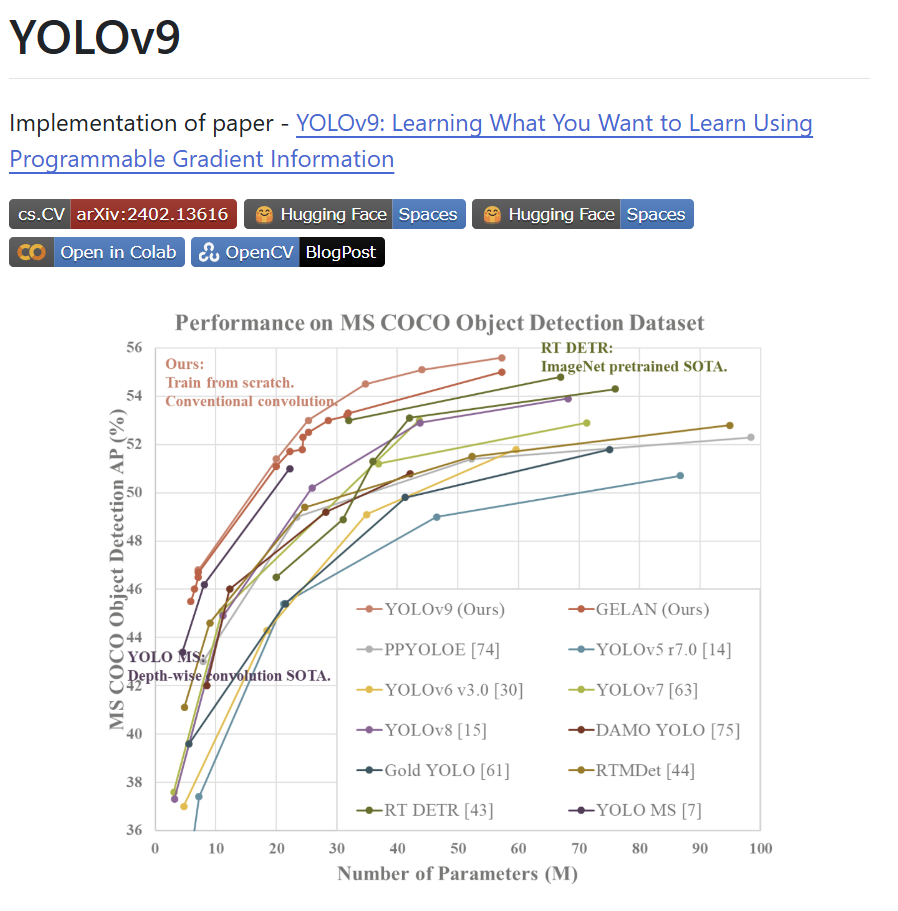

- 데이터 클래스: 80개 (person, bicycle, car, motorcycle, airplane 등)
- 사전학습된 모델로 추가 학습없이 객체 탐지가 가능하며, 추가 탐지하고 싶은 객체 종류는 새롭게 학습을 해야 함 (데이터 라벨링 과정 필요)

### 환경 구축(런타임 GPU 사용으로 변경)
- yolov9 깃 가져오기 및 환경 설치


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!grep -v '^torch' requirements.txt > temp_requirements.txt
!pip install -r temp_requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 325 (delta 145), reused 142 (delta 142), pack-reused 135 (from 1)
Receiving objects: 100% (325/325), 2.23 MiB | 31.34 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
 

In [ ]:
!pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.0/781.0 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 113.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 114.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/19

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov9


In [ ]:
!pip install -q roboflow

## Example 데이터 다운로드 및 사전학습된 COCO model 로 객체탐지 테스트

### 모델 가중치 다운로드

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402448
drwxr-xr-x  2 root root      4096 Jul  4 00:45 .
drwxr-xr-x 12 root root      4096 Jul  4 00:45 ..
-rw-r--r--  1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r--  1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r--  1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/yolo.jpg


detect: weights=['yolov5s.pt'], source=/content/yolo.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

100% 14.1M/14.1M [00:00<00:00, 427MB/s]

Traceback (most recent call last):
  File "/content/yolov9/detect.py", line 232, in <module>
    main(opt)
  File "/content/yolov9/detect.py", line 227, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/content/yolov9/detect.py", line 68, in run
    model = DetectMu

### 에러로 인해 yolov9/models/experimental.py 내에서 torch.load()가 호출되는 부분 수정

- ckpt = torch.load(attempt_download(w), map_location='cpu', weights_only=False)를 명시적으로 수정

In [ ]:
img_path = "/content/yolo.jpg"  # 정확한 경로!


In [ ]:
import os

# 경로 탐색
result_dir = "/content/yolov5/runs/detect"
for root, dirs, files in os.walk(result_dir):
    for file in files:
        print(os.path.join(root, file))


/usr/local/lib/python3.11/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-7-4 Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


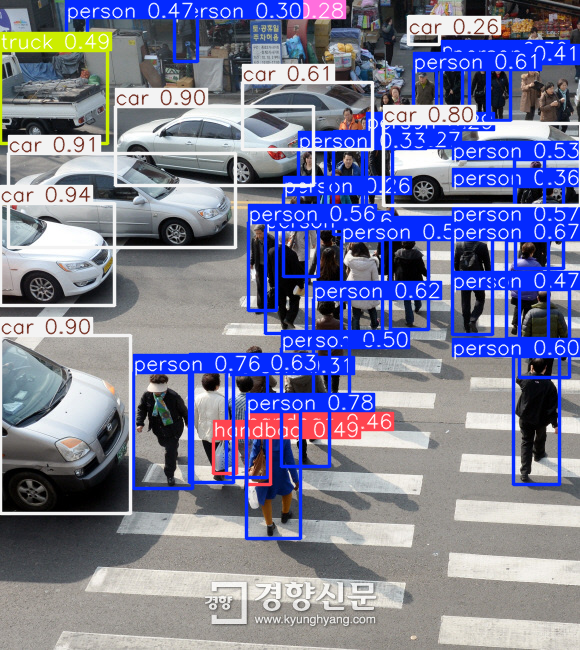

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# 이미지 로드
img_path = '/content/yolo.jpg'  # 이미지 경로
img = Image.open(img_path)

# 객체 감지
results = model(img)

# 결과 시각화
results.show()  # 이미지 새 창 또는 Colab에서 바로 표시


## 커스텀 데이터셋을 활용한 모델 학습 및 추론

- 본 과정에서는 [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) 객체를 탐지하고자 함

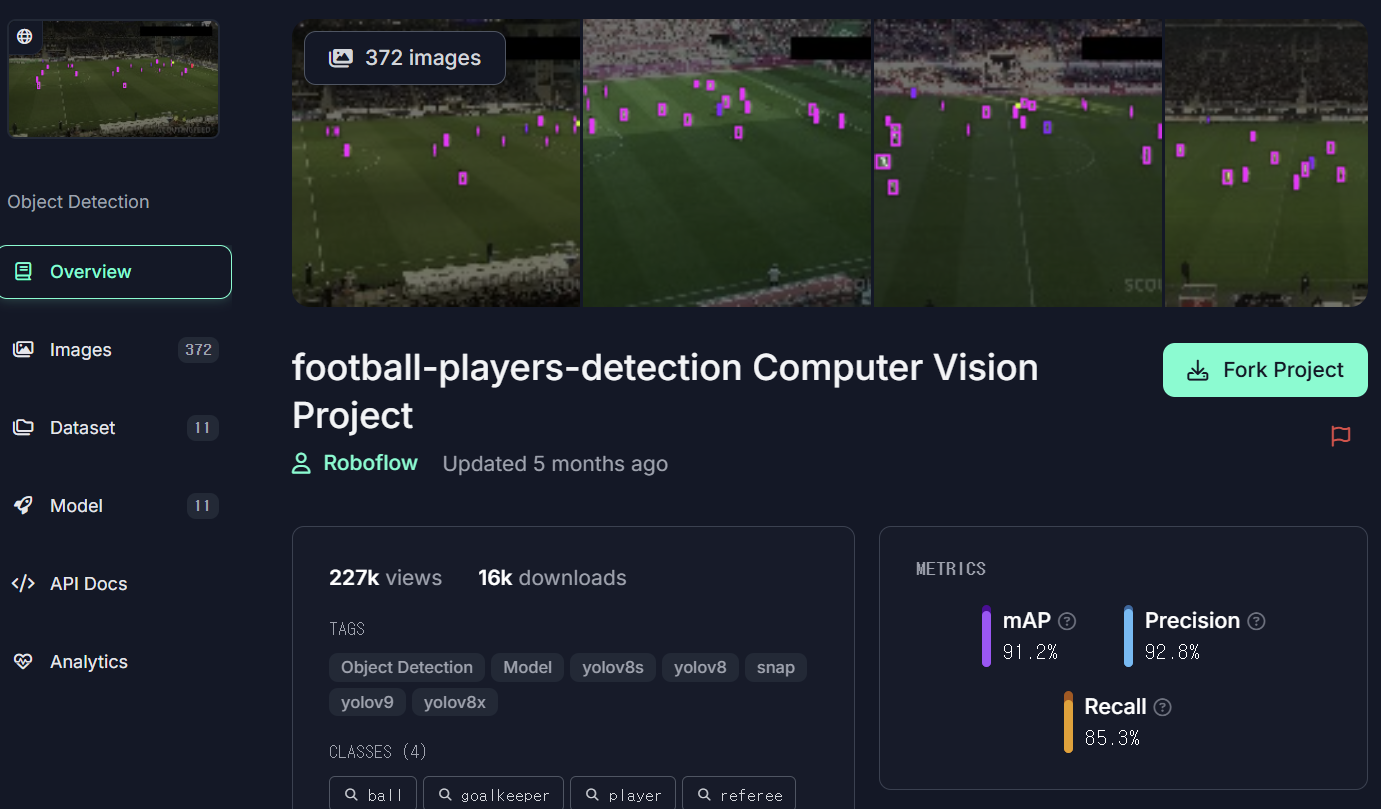

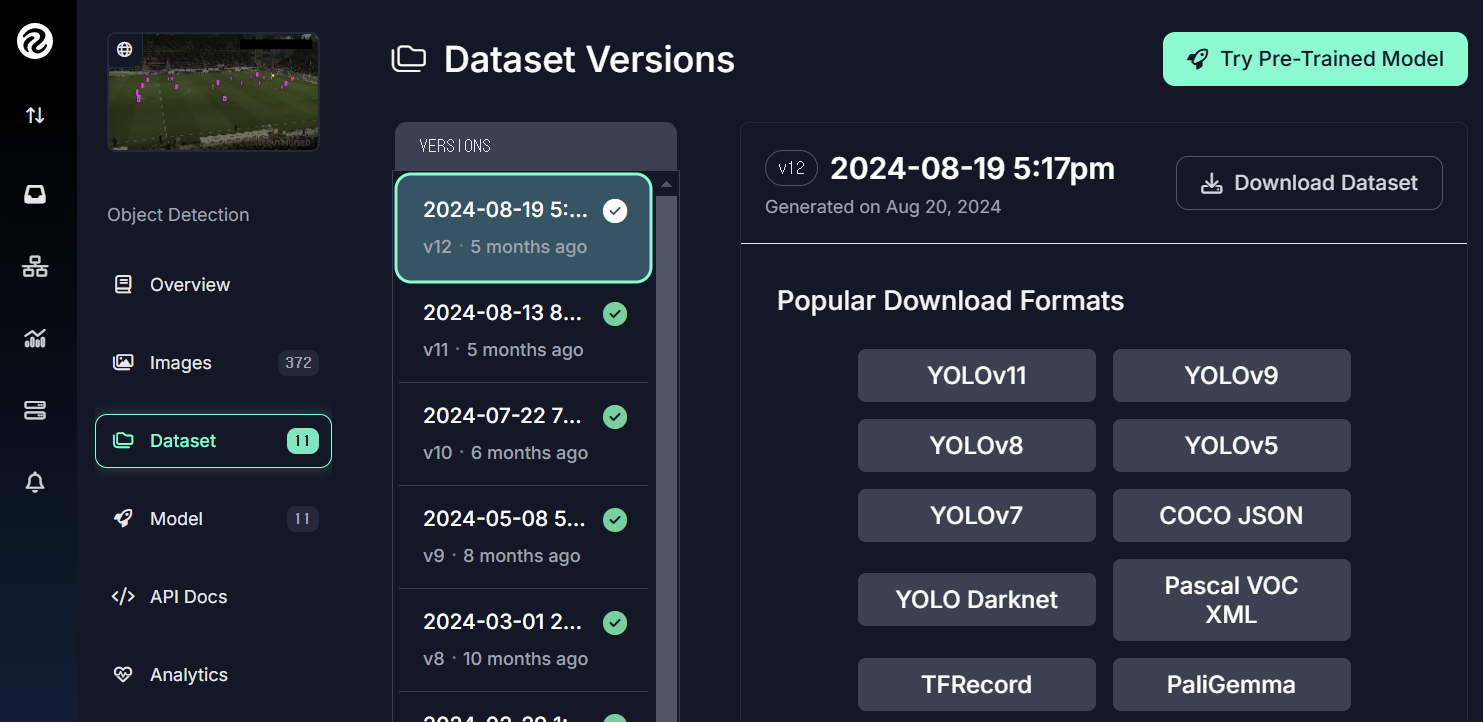

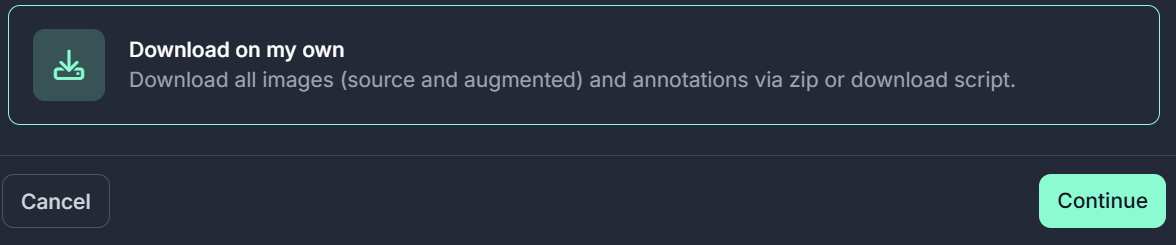

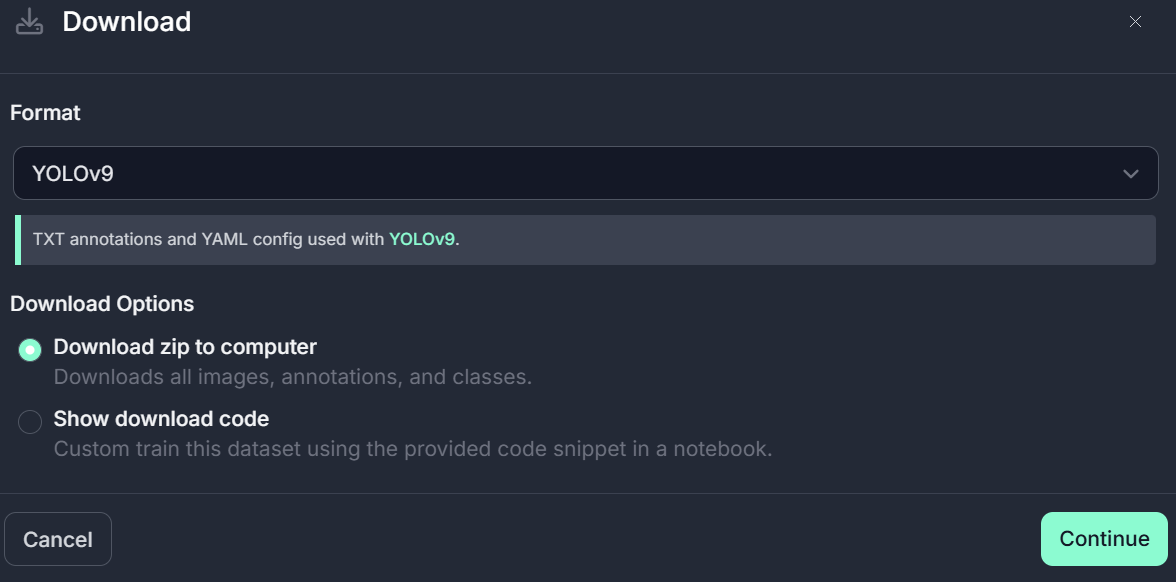

- 다운받은 데이터셋 zip 파일을 colab 내 yolov9 폴더 안에 업로드
- 압축풀고 train, valid, test 데이터셋 체크
- README.dataset.txt, README.roboflow.txt, data.yaml 체크

In [ ]:
pwd

'/content/yolov9'

In [ ]:
!ls


benchmarks.py  models		 segment		val.py
classify       panoptic		 temp_requirements.txt	val_triple.py
data	       __pycache__	 train_dual.py		weights
detect.py      README.md	 train.py		yolov5s.pt
export.py      requirements.txt  train_triple.py
figure	       runs		 utils
hubconf.py     scripts		 val_dual.py


In [ ]:
!unzip -qq "/content/football-players-detection.v14i.yolov9.zip"


In [ ]:
# 실제 학습에서는 10 epoch 이상, loss converge 체크, --device 0 (GPU 있을 시)
!python train.py \
--batch 16 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data data.yaml \
--weights weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

2025-07-04 02:08:32.535008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751594912.555267   28013 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751594912.561508   28013 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=data.yaml, hyp=hyp.scratch-high.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evol

### 실험 결과 (loss)

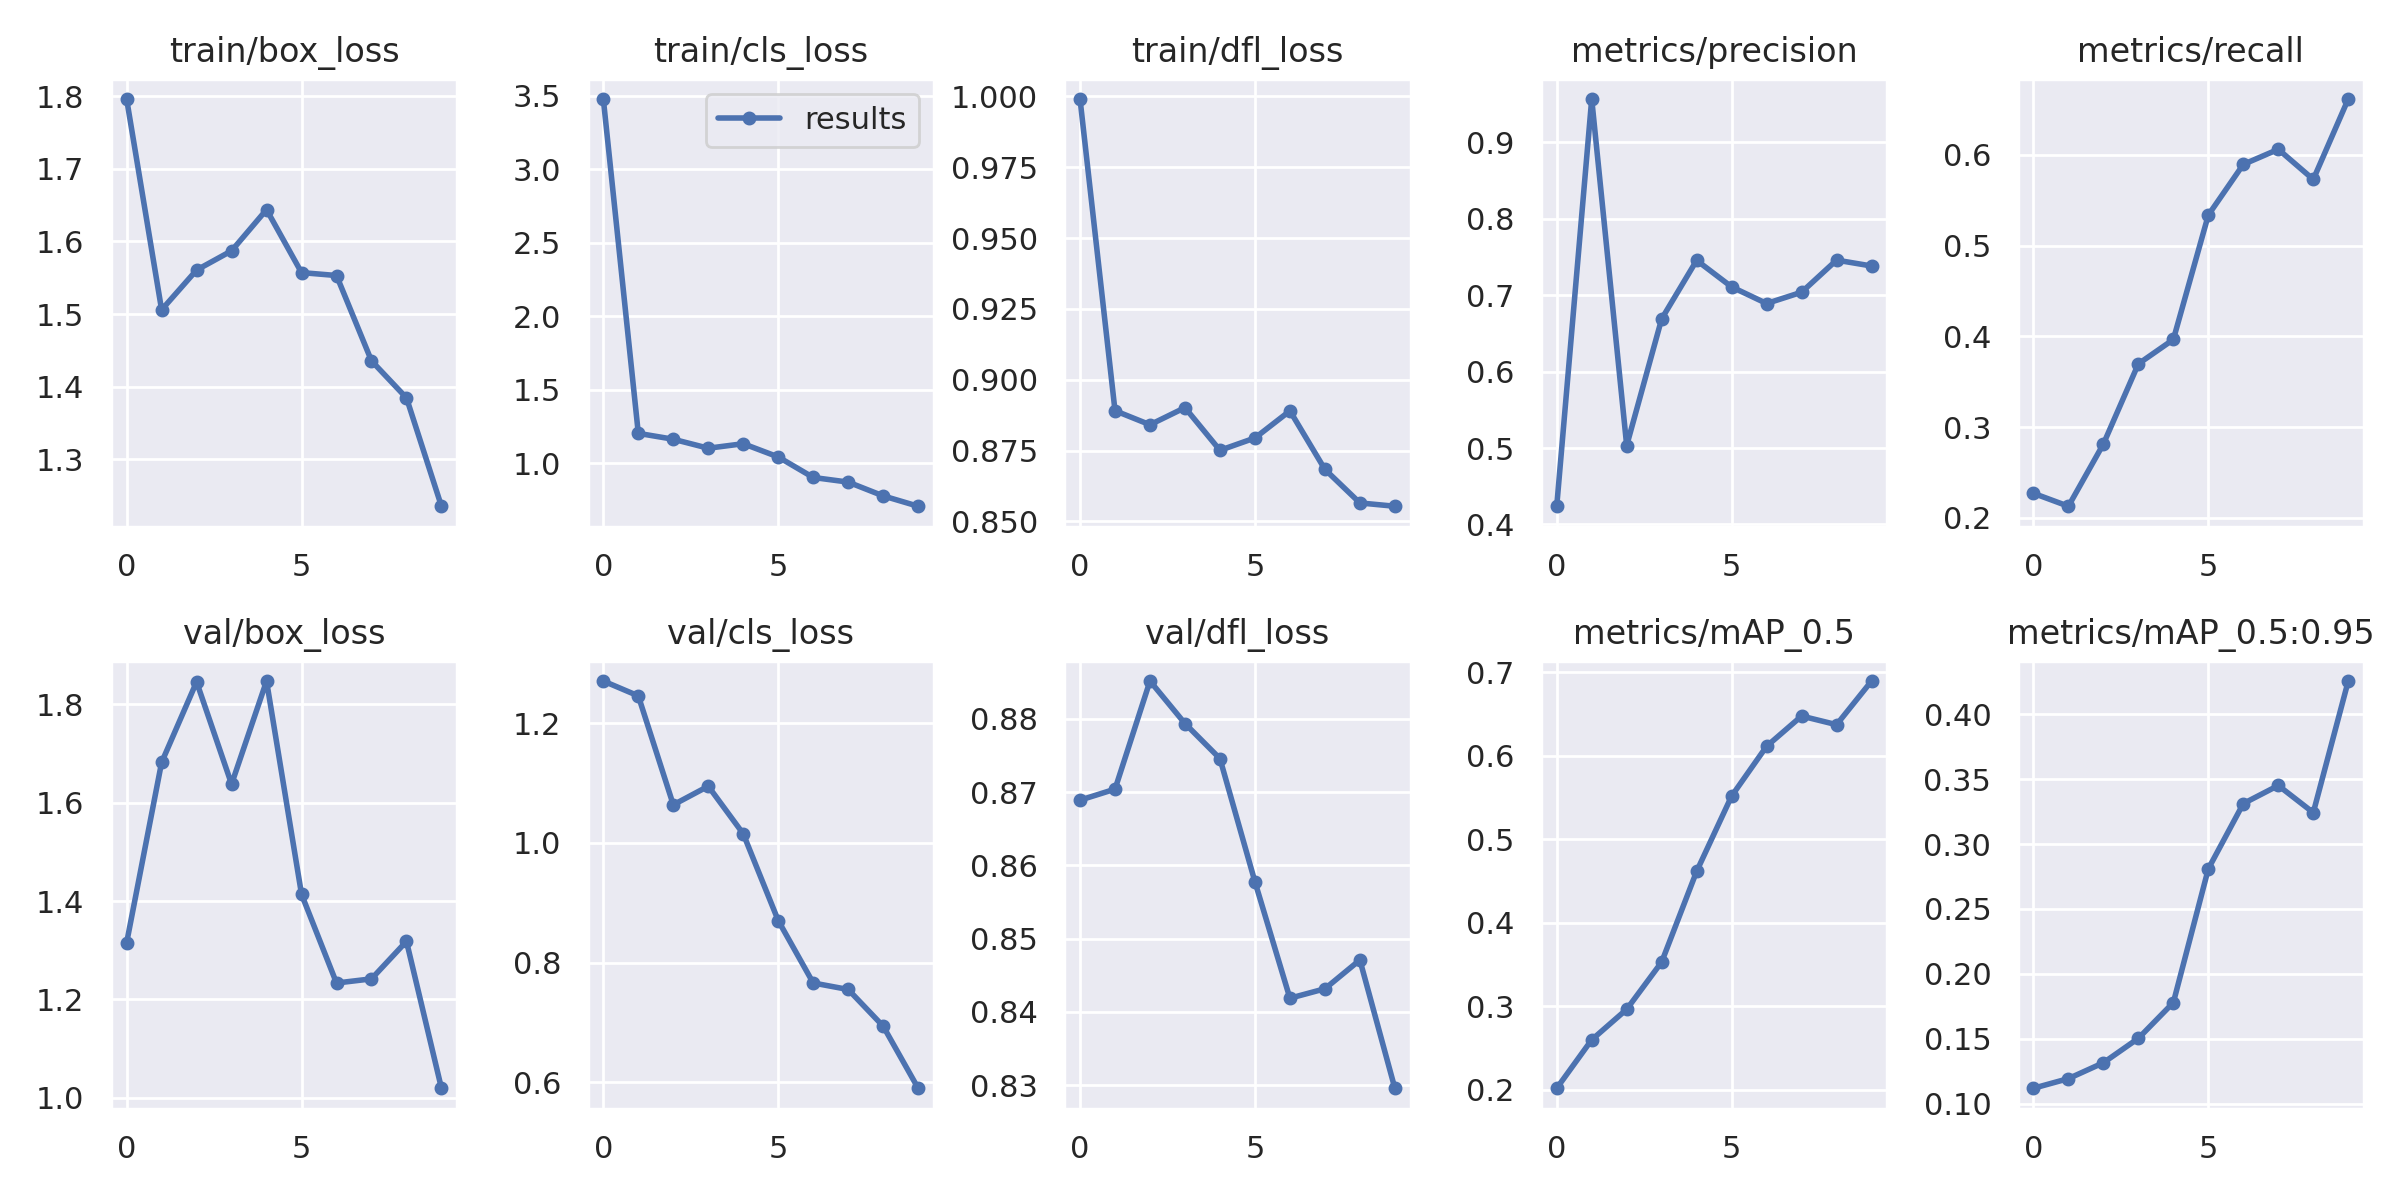

In [ ]:
from IPython.display import Image

Image(filename=f"./runs/train/exp/results.png", width=1000)

### 커스텀 모델 validate 수행

- 가장 성능이 좋은 best.pt 모델을 활용해 수행

In [ ]:
!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data ./data.yaml \
--weights ./runs/train/exp/weights/best.pt

val: data=./data.yaml, weights=['./runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50% 1/2 [00:02<00:02,  2.48s/it]Exception in thread Thread-3 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982

### 학습된 모델 best.pt로 탐지하기

- test 폴더 내 images 로 테스트
- detect.py 를 실행하여 탐지 수행
- 잘 탐지되었는지 확인

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights ./runs/train/exp/weights/best.pt \
--source ./test/images

detect: weights=['./runs/train/exp/weights/best.pt'], source=./test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` w

- 추론 결과는 runs/detect/ 내부 디렉토리에 저장


- 결과 확인

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'./runs/detect/exp2/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))